<a href="https://colab.research.google.com/github/SamuelSSan28/Curso_IA_GEDAI/blob/master/Processamento_de_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd

In [113]:
receitas = pd.read_csv('receitas.csv')
receitas.head()

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
0,30,Dificuldade baixa,5,16
1,45,Dificuldade baixa,9,11
2,45,Dificuldade baixa,11,21
3,15,Dificuldade baixa,9,11
4,10,Dificuldade baixa,5,21


In [114]:
receitas['dificuldade'].value_counts()

Dificuldade baixa      1760
Dificuldade média      1745
Dificuldade elevada      91
Name: dificuldade, dtype: int64

In [186]:
dificeis = receitas.loc[(receitas["quant_passos_preparo"] >= 30) | (receitas["quant_ingredientes"] >=  20) | (receitas["dificuldade"] == "Dificuldade elevada")]
dificeis['dificuldade']  = ["Dificuldade elevada"]* len(dificeis)
dificeis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
93,45,Dificuldade elevada,15,32
135,1440,Dificuldade elevada,5,33
198,45,Dificuldade elevada,8,31
231,90,Dificuldade elevada,13,30
246,150,Dificuldade elevada,14,36
...,...,...,...,...
3552,30,Dificuldade elevada,20,15
3554,150,Dificuldade elevada,21,17
3561,90,Dificuldade elevada,20,18
3578,45,Dificuldade elevada,21,16


In [176]:
medias = receitas.loc[(receitas["quant_passos_preparo"] < 25 ) & (receitas["quant_passos_preparo"] >= 15 )]
medias = medias.loc[(medias["quant_ingredientes"] >  10) &(medias["quant_ingredientes"] < 20) & (medias["dificuldade"] == "Dificuldade média")]
medias

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
1854,45,Dificuldade média,14,17
1855,480,Dificuldade média,12,16
1861,45,Dificuldade média,13,24
1863,45,Dificuldade média,11,19
1864,90,Dificuldade média,13,16
...,...,...,...,...
3586,150,Dificuldade média,19,18
3589,90,Dificuldade média,12,24
3590,1440,Dificuldade média,15,16
3591,45,Dificuldade média,13,16


In [174]:
faceis = receitas.loc[(receitas["quant_passos_preparo"] < 10 ) & (receitas["quant_ingredientes"] <  10) & (receitas["dificuldade"] == "Dificuldade baixa")]
faceis

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
15,15,Dificuldade baixa,7,9
16,15,Dificuldade baixa,6,9
56,30,Dificuldade baixa,7,7
106,30,Dificuldade baixa,9,9
144,90,Dificuldade baixa,4,8
...,...,...,...,...
1746,10,Dificuldade baixa,4,7
1749,30,Dificuldade baixa,6,8
1750,10,Dificuldade baixa,8,6
1751,30,Dificuldade baixa,9,9


In [187]:
receitas_concat = pd.concat([faceis, medias,dificeis])

In [188]:
receitas_concat.shape

(1035, 4)

## Machine Learning

In [189]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(receitas_concat[['quant_ingredientes','quant_passos_preparo']])
df_normalized = pd.DataFrame(np_scaled)
#df_normalized["dificuldade"] = receitas['dificuldade']
#df_normalized.to_csv (r'receitasN.csv', index = False, header=True)
df_normalized



,0,1
0,0.121212,0.111111
1,0.090909,0.111111
2,0.121212,0.066667
3,0.181818,0.111111
4,0.030303,0.088889
...,...,...
1030,0.515152,0.244444
1031,0.545455,0.288889
1032,0.515152,0.311111
1033,0.545455,0.266667


In [190]:
receitas_concat['dificuldade'].value_counts()

Dificuldade média      534
Dificuldade baixa      287
Dificuldade elevada    214
Name: dificuldade, dtype: int64

In [199]:
receitas_concat.to_csv(r"receitas_passos_ingrediente.csv" ,index = False, header=True)

In [200]:
from sklearn.model_selection import train_test_split
import numpy as np

x = receitas_concat[['quant_ingredientes',	'quant_passos_preparo']]
y = receitas_concat['dificuldade']

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(776, 2)
(259, 2)
(776,)
(259,)


In [201]:
from sklearn import tree

classificador = tree.DecisionTreeClassifier()

modelo_tree_receitas = classificador.fit(x_treino,y_treino)

In [202]:
predicao = modelo_tree_receitas.predict(x_teste)

In [203]:
validar = y_teste == predicao

In [204]:
validar.value_counts()

True     249
False     10
Name: dificuldade, dtype: int64

In [205]:
predicao_treino = modelo_tree_receitas.predict(x_treino)

In [206]:
validar_treino = y_treino == predicao_treino

In [207]:
validar_treino.value_counts()

True     746
False     30
Name: dificuldade, dtype: int64

## Graficos


In [139]:
receitas = pd.read_csv('receitas.csv')
receitas.head()

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
0,30,Dificuldade baixa,5,16
1,45,Dificuldade baixa,9,11
2,45,Dificuldade baixa,11,21
3,15,Dificuldade baixa,9,11
4,10,Dificuldade baixa,5,21


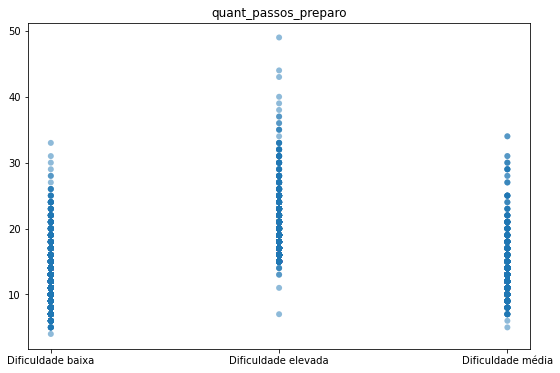

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6),)
plt.title("quant_passos_preparo")
ax.scatter(x=receitas_concat['dificuldade'],y= receitas_concat['quant_passos_preparo'],
               alpha=0.5, edgecolors='none')

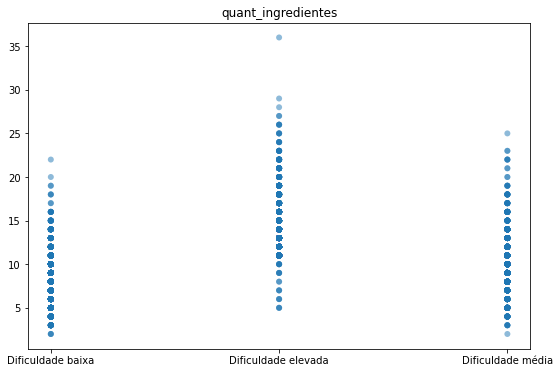

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6),)
plt.title("quant_ingredientes")
ax.scatter(x=receitas_concat['dificuldade'],y= receitas_concat['quant_ingredientes'],
               alpha=0.5, edgecolors='none')

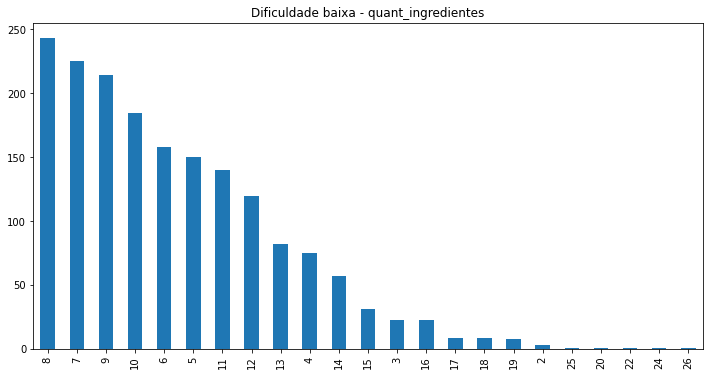

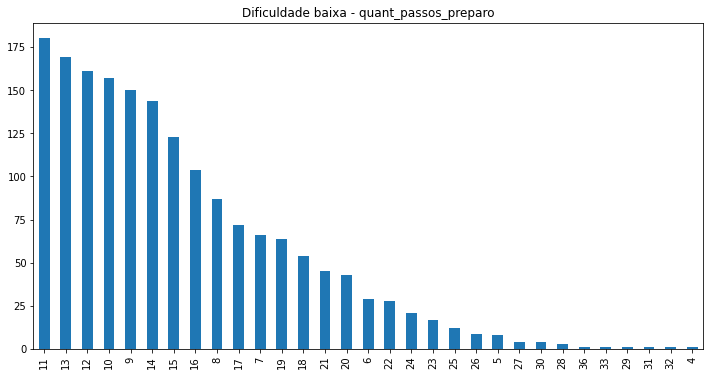

In [164]:
faceis = receitas.query("dificuldade == 'Dificuldade baixa'")['quant_ingredientes'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade baixa - quant_ingredientes')
faceis.plot(kind="bar")

faceis = receitas.query("dificuldade == 'Dificuldade baixa'")['quant_passos_preparo'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade baixa - quant_passos_preparo')
faceis.plot(kind="bar")

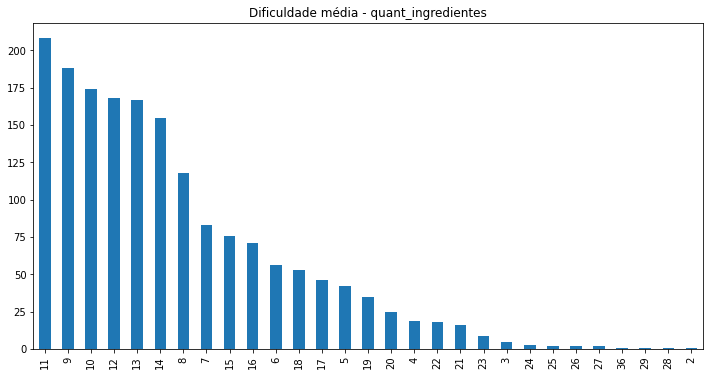

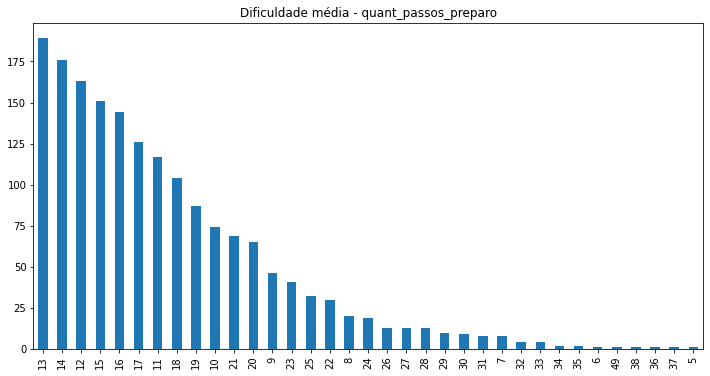

In [167]:
medias = receitas.query("dificuldade == 'Dificuldade média'")['quant_ingredientes'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade média - quant_ingredientes')
medias.plot(kind="bar")

medias = receitas.query("dificuldade == 'Dificuldade média'")['quant_passos_preparo'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade média - quant_passos_preparo')
medias.plot(kind="bar")

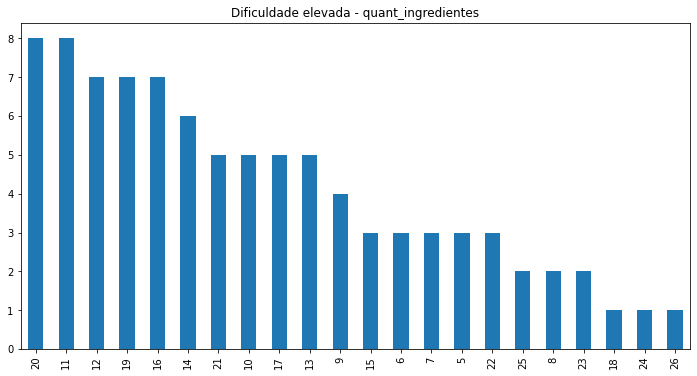

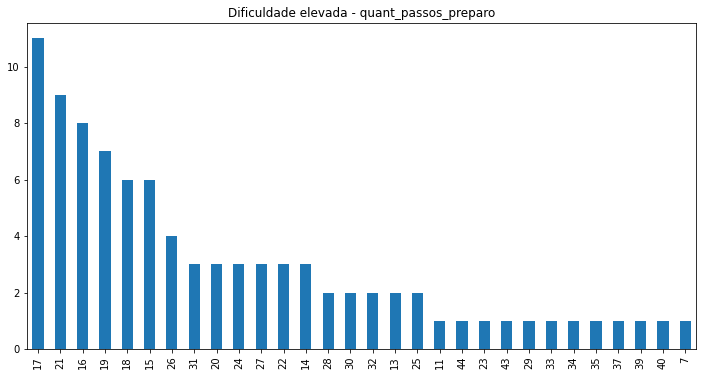

In [166]:
dificeis = receitas.query("dificuldade == 'Dificuldade elevada'")['quant_ingredientes'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade elevada - quant_ingredientes')
dificeis.plot(kind="bar")


dificeis = receitas.query("dificuldade == 'Dificuldade elevada'")['quant_passos_preparo'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade elevada - quant_passos_preparo')
dificeis.plot(kind="bar")
